# The best way to maximize life expectancy
Student names: Leonardo Vinkestijn, Thijn van Veen, Luca Bartling, Sebastiaan Poggenklaas 

Student numbers: 15254305, 15258556, 14949199, 15248348

Team number: I2

## Introduction

Over the past couple of decades, life expectancy has been increasing among industrialized countries. But if we want to increase it even further, where should we invest the most? In this project, we will research whether education should be at the top of the investment list or if we should invest in a different area, such as vaccines. We will answer this by examining the correlation between GDP, education, vaccines, and life expectancy. The data that is used for this correlation is from Kaggle and the world bank.

## Dataset and Preprocessing

We used three data sets for this process. The most important data set is the life expectancy data set, which can be found at https://www.kaggle.com/datasets/amirhosseinmirzaie/countries-life-expectancy.
This data set is the main data set used for the life expectancy and vaccination columns. The second data set used is the GDP per capita data set, which can be found at https://www.kaggle.com/datasets/nitishabharathi/gdp-per-capita-all-countries. This dataset contains all gdp per capita for most countries for the past 30 years, this is mainly used for correlations that can be found between life expectancy and GDP per capita. The last dataset used is the education dat set, which can be found at https://data.worldbank.org/topic/education , information about the education level was extracted from this data set, this information consists of the number of children who attend primary and secondary school.

#### **Cleaning**
Before we were able to merge these three files, some preprocessing was done. The edudata and GDP datasets have the years as variables, but the life expectancy dataset has the years as entries. To equalize this, the years in the gdp and edudata have been moved to the entries using melt. 
After all datasets had the same form, the two columns 'learning' and 'GDP' were first removed from the life expectancy data set. This was done because in the case of the learning column it was not clear how it was constructed, hence the edu dataset. The GDP column contains too many empty entries to be useful so we replaced it with the GDP data set. 
Before these datasets could be joined, the naming of countries had to be manually matched. An example of this is 'united kingdom' instead of 'united kingdom of Britain and northern Ireland'. The names were equalized across all the datasets and the choropleth map we used, this was done so that the data would be displayed nicely. 
The datasets were then joined using inner join on the variables ‘years’ and ‘country names’. This produces a table with the following values, 459200 rows × 23 columns

#### **Variable description**

Nominal
Discrete
Country, Country Code, Indicator Name, Indicator Code,
Ordinal
Discrete
Status
Interval
Discrete
Year, Value
Ratio
Discrete
Population, Hepatitis B, Measles, Polio, Diphtheria, HIV/AIDS, infant deaths 
Interval
Continues
Life expectancy, Value
Ratio
Continues
GDP, Total expenditure, BMI, thinness 1-19 years,Alcohol





## Your First Perspective

Investing in the educational sector is the best way to increase a country's life expectancy.




### The First Argument of Your First Perspective

As seen in the dataset, it's very common for countries with a good education to also have a high life expectancy. To make it more clear, the data can be visualized in this Bivariate Choropleth: Als een land een betere educatie heeft, dan heeft een land bijna altijd een hogere life-expectancy (bron: Bivariate Choropleth)

In this image, the left side of the legend is the education level, and the right side is the life expectancy. As shown, almost all countries with good education quality also have a high life expectancy. The reasoning behind this might be that people with better education tend to choose for a healthier way of life. It can also be visualized in the following way. This plot shows the rate in which people finish primary and secondary school, compared to the life expectancy of said person. This graph makes clear that people with better education tend to have a higher life expectancy. A reason for this increase in life expectancy comes from the fact that people with a better education make better choices. https://archpublichealth.biomedcentral.com/articles/10.1186/s13690-020-00402-5 

/tmp/ipykernel_53299/1782813194.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_53299/1782813194.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Var1_Class'] = data['Var1_Class'].replace(d)
/tmp/ipykernel_53299/1782813194.py:64: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  border = gpd.read_file(gpd.datasets.get_p

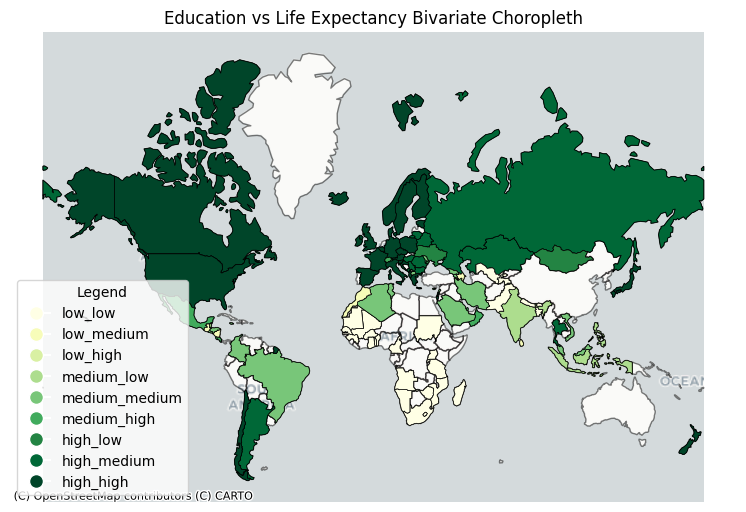

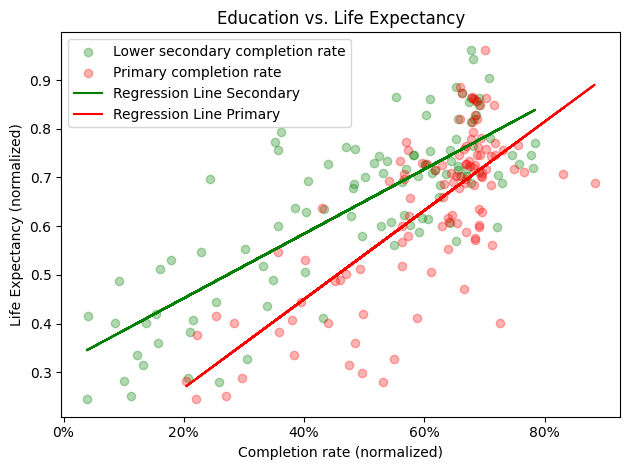

In [12]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats.mstats import winsorize
data = gpd.read_file('Normalized_Dataset_EDU.csv')
data.head()
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')


# Laad de dataset met landen grenzen

border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the non-spatial data with the spatial GeoDataFrame based on the country name
# Assuming 'Country' in CSV and 'name' in border GeoDataFrame
merged_data = border.merge(data, left_on='name', right_on='Country')
# Plot histograms of the 'edu' and 'Life expectancy' columns
bins = [0, 0.33, 0.66, 1]

# Bin the first variable - x
data['Var1_Class'] = pd.cut(data['Value'], bins=bins, include_lowest=True)
data['Var1_Class'] = data['Var1_Class'].astype('str')

# Bin the second variable - y
data['Var2_Class'] = pd.cut(data['Life expectancy'], bins=bins, include_lowest=True)
data['Var2_Class'] = data['Var2_Class'].astype('str')

# Code created x bins to 1, 2, 3
x_class_codes = np.arange(1, len(bins))
d = dict(zip(data['Var1_Class'].value_counts().sort_index().index, x_class_codes))
data['Var1_Class'] = data['Var1_Class'].replace(d)

# Code created y bins to A, B, C
y_class_codes = ['A', 'B', 'C']
d = dict(zip(data['Var2_Class'].value_counts().sort_index().index, y_class_codes))
data['Var2_Class'] = data['Var2_Class'].replace(d)

# Combine x and y codes to create Bi_Class
data['Bi_Class'] = data['Var1_Class'].astype('str') + data['Var2_Class']
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          '#64acbe', # 1C
          '#e4acac', # 2A
          '#ad9ea5', # 2B
          '#627f8c', # 2C
          '#c85a5a', # 3A
          '#985356', # 3B
          '#574249'] # 3C
            
from shapely.geometry import Point
import contextily as ctx

# Load the CSV file
data = pd.read_csv('Normalized_Dataset_EDU.csv')

# Convert the 'edu' and 'Life expectancy' columns to numeric
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')

# Load the dataset with country borders
border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
border = border[border['name'] != 'Antarctica']
# Merge the non-spatial data with the spatial GeoDataFrame based on the country name
# Assuming 'Country' in CSV and 'name' in border GeoDataFrame
merged_data = border.merge(data, left_on='name', right_on='Country')

# Ensure the GeoDataFrame has a CRS set
if merged_data.crs is None:
    merged_data = merged_data.set_crs('EPSG:4326')  # Assuming WGS84

# Add the 'Bi_Class' column to your data for bivariate choropleth (example here)
# This should be defined according to your specific logic
merged_data['Bi_Class'] = pd.qcut(merged_data['Value'], 3, labels=['low', 'medium', 'high']).astype(str) + \
                          pd.qcut(merged_data['Life expectancy'], 3, labels=['_low', '_medium', '_high']).astype(str)

# Define custom colors for each category
category_colors = {
    'low_low': '#ffffe5',  # low edu, low life expectancy
    'low_medium': '#f7fcb9',  # low edu, medium life expectancy
    'low_high': '#d9f0a3',  # low edu, high life expectancy
    'medium_low': '#addd8e',  # medium edu, low life expectancy
    'medium_medium': '#78c679',  # medium edu, medium life expectancy
    'medium_high': '#41ab5d',  # medium edu, high life expectancy
    'high_low': '#238443',  # high edu, low life expectancy
    'high_medium': '#006837',  # high edu, medium life expectancy
    'high_high': '#004529'  # high edu, high life expectancy
}
merged_data['color'] = merged_data['Bi_Class'].map(category_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Step 1: Draw the map
border.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)  # country borders
merged_data.to_crs('EPSG:3857').plot(ax=ax,
                                     column='Bi_Class',  # variable that is going to be used to color the map
                                     legend=False,  # we're going to draw the legend ourselves
                                     categorical=True,  # bivariate choropleth has to be colored as categorical map
                                     color=merged_data['color'],
                                     linewidth=0.5,
                                     edgecolor='black',
                                     legend_kwds={'loc': 'lower left'})  # position of legend

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.tight_layout()  # "tighten" two figures map and basemap
plt.axis('off')  # we don't need axis with coordinates
ax.set_title('Education vs Life Expectancy Bivariate Choropleth')

# Step 2: Draw the legend
# Create a custom legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                  for label, color in category_colors.items()]
ax.legend(handles=legend_handles, loc='lower left', title='Legend')

plt.show()
import matplotlib.ticker as mtick
df = pd.read_csv("Normalized_Dataset_edu-prisectet.csv", usecols=['Year',"GDP", 'Country', "Value", "Indicator Name",  "Indicator Code", 'Life expectancy'])
second_df = df[df["Indicator Name"].str.contains("Lower secondary completion rate") == True]
third_df = df[df["Indicator Name"].str.contains("Primary completion rate") == True]
second_df.to_csv("Normalized_Dataset_edu-prisectet1.csv", index=False)
third_df.to_csv("Normalized_Dataset_edu-prisectet2.csv", index=False)
plt.scatter(second_df['Value'], second_df['Life expectancy'], alpha=0.3, c='green', label='Lower secondary completion rate')
plt.scatter(third_df['Value'], third_df['Life expectancy'], alpha=0.3, c='red', label='Primary completion rate')
plt.xlabel('Completion rate (normalized)')
plt.ylabel('Life Expectancy (normalized)')
plt.title('Education vs. Life Expectancy')

x_clean = second_df['Value']
y_clean = second_df['Life expectancy']

# Performing linear regression
slope, intercept = np.polyfit(x_clean, y_clean, 1)

# Calculate the values of the regression line
regression_line = slope * x_clean + intercept

# Create a combined scatter plot with the regression line
plt.plot(x_clean, regression_line, color='green', label='Regression Line Secondary')

x_clean = third_df['Value']
y_clean = third_df['Life expectancy']

# Performing linear regression
slope, intercept = np.polyfit(x_clean, y_clean, 1)

# Calculate the values of the regression line
regression_line = slope * x_clean + intercept
ax = plt.subplot(1,1,1)
# Create a combined scatter plot with the regression line
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.plot(x_clean, regression_line, color='red', label='Regression Line Primary')
plt.legend()
plt.tight_layout()
plt.show()


### The Second Argument of Your First Perspective

We can also argue that a society with a good education will produce an increasing GDP. Research at the university of Munich has shown that people with a better education are able to achieve jobs with more complex skill sets, resulting in a higher paying job. If people in a society are able to keep higher paying jobs, the GDP from the country of origin will increase. This in turn will influence the life expectancy of a country. Research originating from the University of Zagreb has shown that an increase in GDP of a country, also has a positive influence on the country's life expectancy. This is confirmed when you convert the data into a Bivariate Chropleth or a scatter plot (with a regression). These charts show the GDP of a country and the country's life expectancy. This means that the increase in education gives an increase in GDP which delivers an increase in life expectancy. 


/tmp/ipykernel_53299/2409927893.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_53299/2409927893.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Var1_Class'] = data['Var1_Class'].replace(d)
/tmp/ipykernel_53299/2409927893.py:61: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  border = gpd.read_file(gpd.datasets.get_p

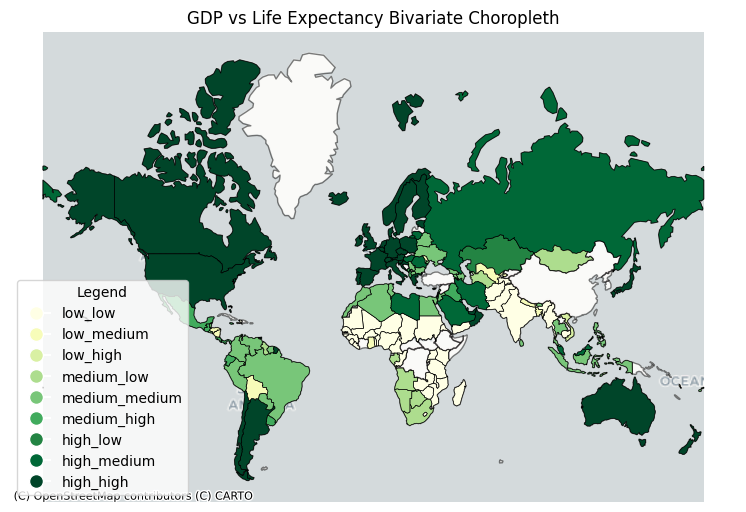

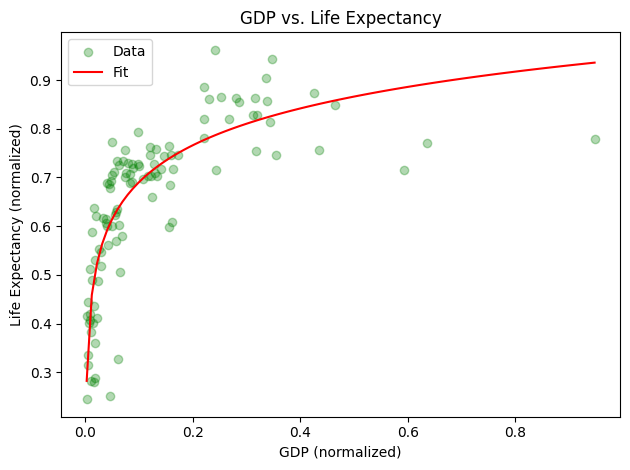

/tmp/ipykernel_53299/2409927893.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['z_score_GDP'] = zscore(second_df['GDP'])
/tmp/ipykernel_53299/2409927893.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['z_score_Value'] = zscore(second_df['Value'])


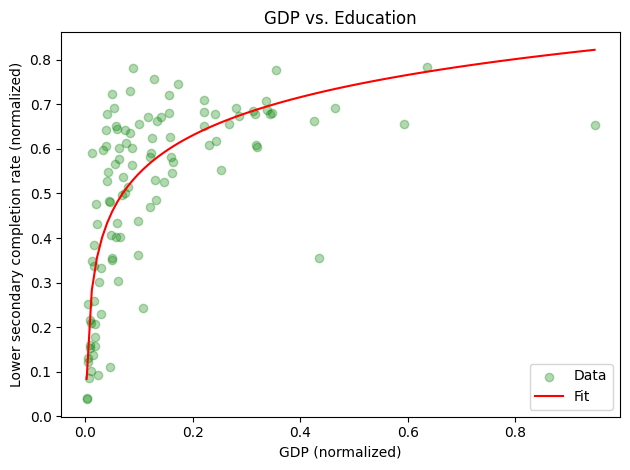

In [13]:
data = gpd.read_file('Normalized_Dataset.csv')
data.head()
data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')
import geopandas as gpd
import matplotlib.pyplot as plt

# Laad de dataset met landen grenzen

border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the non-spatial data with the spatial GeoDataFrame based on the country name
# Assuming 'Country' in CSV and 'name' in border GeoDataFrame
merged_data = border.merge(data, left_on='name', right_on='Country')
# Plot histograms of the 'GDP' and 'Life expectancy' columns
bins = [0, 0.33, 0.66, 1]

# Bin the first variable - x
data['Var1_Class'] = pd.cut(data['GDP'], bins=bins, include_lowest=True)
data['Var1_Class'] = data['Var1_Class'].astype('str')

# Bin the second variable - y
data['Var2_Class'] = pd.cut(data['Life expectancy'], bins=bins, include_lowest=True)
data['Var2_Class'] = data['Var2_Class'].astype('str')

# Code created x bins to 1, 2, 3
x_class_codes = np.arange(1, len(bins))
d = dict(zip(data['Var1_Class'].value_counts().sort_index().index, x_class_codes))
data['Var1_Class'] = data['Var1_Class'].replace(d)

# Code created y bins to A, B, C
y_class_codes = ['A', 'B', 'C']
d = dict(zip(data['Var2_Class'].value_counts().sort_index().index, y_class_codes))
data['Var2_Class'] = data['Var2_Class'].replace(d)

# Combine x and y codes to create Bi_Class
data['Bi_Class'] = data['Var1_Class'].astype('str') + data['Var2_Class']
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          '#64acbe', # 1C
          '#e4acac', # 2A
          '#ad9ea5', # 2B
          '#627f8c', # 2C
          '#c85a5a', # 3A
          '#985356', # 3B
          '#574249'] # 3C
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Load the CSV file
data = pd.read_csv('Normalized_Dataset.csv')

# Convert the 'GDP' and 'Life expectancy' columns to numeric
data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')

# Load the dataset with country borders
border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
border = border[border['name'] != 'Antarctica']
# Merge the non-spatial data with the spatial GeoDataFrame based on the country name
# Assuming 'Country' in CSV and 'name' in border GeoDataFrame
merged_data = border.merge(data, left_on='name', right_on='Country')

# Ensure the GeoDataFrame has a CRS set
if merged_data.crs is None:
    merged_data = merged_data.set_crs('EPSG:4326')  # Assuming WGS84

# Add the 'Bi_Class' column to your data for bivariate choropleth (example here)
# This should be defined according to your specific logic
merged_data['Bi_Class'] = pd.qcut(merged_data['GDP'], 3, labels=['low', 'medium', 'high']).astype(str) + \
                          pd.qcut(merged_data['Life expectancy'], 3, labels=['_low', '_medium', '_high']).astype(str)

# Define custom colors for each category
category_colors = {
    'low_low': '#ffffe5',  # low GDP, low life expectancy
    'low_medium': '#f7fcb9',  # low GDP, medium life expectancy
    'low_high': '#d9f0a3',  # low GDP, high life expectancy
    'medium_low': '#addd8e',  # medium GDP, low life expectancy
    'medium_medium': '#78c679',  # medium GDP, medium life expectancy
    'medium_high': '#41ab5d',  # medium GDP, high life expectancy
    'high_low': '#238443',  # high GDP, low life expectancy
    'high_medium': '#006837',  # high GDP, medium life expectancy
    'high_high': '#004529'  # high GDP, high life expectancy
}
merged_data['color'] = merged_data['Bi_Class'].map(category_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Step 1: Draw the map
border.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)  # country borders
merged_data.to_crs('EPSG:3857').plot(ax=ax,
                                     column='Bi_Class',  # variable that is going to be used to color the map
                                     legend=False,  # we're going to draw the legend ourselves
                                     categorical=True,  # bivariate choropleth has to be colored as categorical map
                                     color=merged_data['color'],
                                     linewidth=0.5,
                                     edgecolor='black',
                                     legend_kwds={'loc': 'lower left'})  # position of legend

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.tight_layout()  # "tighten" two figures map and basemap
plt.axis('off')  # we don't need axis with coordinates
ax.set_title('GDP vs Life Expectancy Bivariate Choropleth')

# Step 2: Draw the legend
# Create a custom legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                  for label, color in category_colors.items()]
ax.legend(handles=legend_handles, loc='lower left', title='Legend')

plt.show()
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
df = pd.read_csv("Normalized_Dataset_edu-prisectet.csv", usecols=['Year',"GDP", 'Country', "Value", "Indicator Name",  "Indicator Code", 'Life expectancy'])
second_df = df[df["Indicator Name"].str.contains("Lower secondary completion rate") == True]
third_df = df[df["Indicator Name"].str.contains("Primary completion rate") == True]
second_df.to_csv("Normalized_Dataset_edu-prisectet1.csv", index=False)
third_df.to_csv("Normalized_Dataset_edu-prisectet2.csv", index=False)
# Assuming second_df and final_df are already defined DataFrames

# Define a logarithmic function for fitting
def log_func(x, a, b):
    return a * np.log(x) + b

# Extract cleaned data for fitting
x_second_cleaned = second_df["GDP"].values
y_second_cleaned = second_df["Life expectancy"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_second_cleaned, y_second_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_second_cleaned), max(x_second_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=second_df["GDP"], y=second_df["Life expectancy"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Life Expectancy (normalized)'))



# Optionally, you can use matplotlib to show the fit
plt.scatter(second_df['GDP'], second_df['Life expectancy'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Life Expectancy (normalized)')
plt.title('GDP vs. Life Expectancy')
plt.legend()
plt.tight_layout()
plt.show()
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.optimize import curve_fit
from scipy.stats import zscore
import matplotlib.pyplot as plt

def log_func(x, a, b):
    return a * np.log(x) + b


# Calculate the z-scores of the data
second_df['z_score_GDP'] = zscore(second_df['GDP'])
second_df['z_score_Value'] = zscore(second_df['Value'])

# Define a threshold to identify outliers
threshold = 6

# Filter the data to remove outliers
filtered_df = second_df[(np.abs(second_df['z_score_GDP']) < threshold) & (np.abs(second_df['z_score_Value']) < threshold)]

# Extract cleaned data for fitting
x_cleaned = filtered_df["GDP"].values
y_cleaned = filtered_df["Value"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_cleaned, y_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_cleaned), max(x_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=filtered_df["GDP"], y=filtered_df["Value"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Completion rate (normalized)'))


# Optionally, you can use matplotlib to show the fit
plt.scatter(filtered_df['GDP'], filtered_df['Value'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Lower secondary completion rate (normalized)')
plt.title('GDP vs. Education')
plt.legend()
plt.tight_layout()
plt.show()


## Your Second Perspective

There are other factors that have more influence on life expectancy that should be prioritized.

### The First Argument of Your Second Perspective

Even though A country investing in their education program results in an increase in life expectancy. There are more direct approaches to increasing a country's life expectancy. One possible solution is investing in increasing the country's vaccination rate. Diseases or viruses like Polio and Diphtheria can be fatal if not treated appropriately, in some cases (like for polio) there is no cure at all. Not treating these diseases results in a drastic decrease in life expectancy. So instead of investing in education to improve life expectancy, a country should invest in vaccines as this has a more direct effect. This can be seen in the plot where it shows an increase in vaccination rate for polio and Diphtheria corresponds with an increase in life expectancy. This is also found in the research by Jenifer Ehreth. Which concludes that improving the vaccination rate is a big factor in increasing a country's life expectancy.
https://www.sciencedirect.com/science/article/pii/S0264410X03003773 


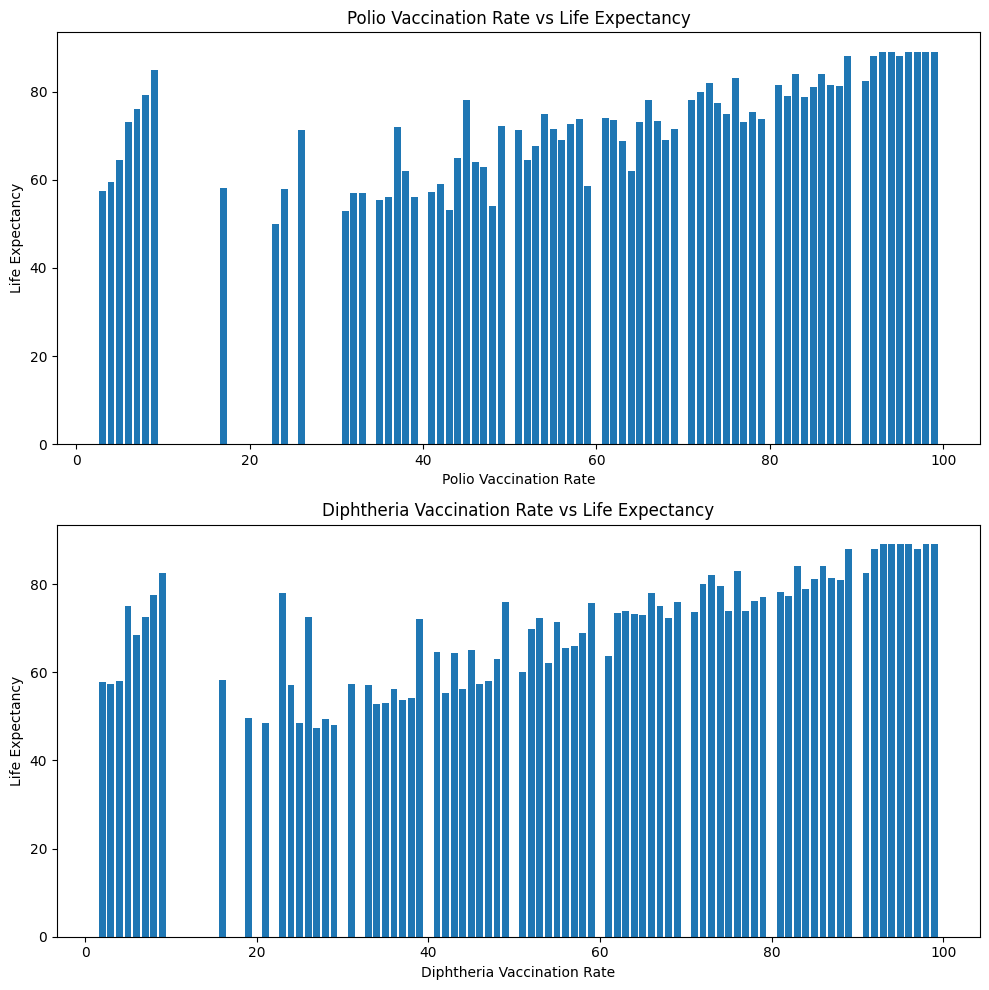

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_life = pd.read_csv('life_expectancy.csv')

# Create a figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Sort the DataFrame by 'Polio' column and plot
df_life_sorted_polio = df_life.sort_values(by='Polio')
ax1.bar(df_life_sorted_polio['Polio'], df_life_sorted_polio['Life expectancy'])
ax1.set_xlabel('Polio Vaccination Rate')
ax1.set_ylabel('Life Expectancy')
ax1.set_title('Polio Vaccination Rate vs Life Expectancy')

# Sort the DataFrame by 'Diphtheria' column and plot
df_life_sorted_diphtheria = df_life.sort_values(by = 'Diphtheria')
ax2.bar(df_life_sorted_diphtheria['Diphtheria'], df_life_sorted_diphtheria['Life expectancy'])
ax2.set_xlabel('Diphtheria Vaccination Rate')
ax2.set_ylabel('Life Expectancy')
ax2.set_title('Diphtheria Vaccination Rate vs Life Expectancy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
import plotly.express as px
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('life_expectancy.csv')

# Drop rows with NaN values in Population (if applicable)
df = df.dropna(subset=['Population'])

# Ensure that 'Country' and 'Year' are present as columns
years_sorted = sorted(df['Year'].unique())

# Create the scatter plot with Plotly Express
fig = px.scatter(df, 
                 x='Polio', 
                 y='Life expectancy', 
                 animation_frame='Year', 
                 animation_group='Country',
                 size='Population', 
                 color='Country', 
                 hover_name='Country',
                 size_max=150, 
                 range_x=[0, 100], 
                 range_y=[25, 90],
                 category_orders={'Year': years_sorted})

# Update the layout with x-axis titles and other configurations
fig.update_layout(
    title="Life Expectancy vs Vaccination Rates",
    xaxis=dict(title='Polio Vaccination Rate'),   # Initial x-axis title
    yaxis=dict(title='Life Expectancy'),          # y-axis title
    showlegend=True,
)

# Show the plot
fig.show()

## References

https://www.kaggle.com/datasets/amirhosseinmirzaie/countries-life-expectancy

https://www.kaggle.com/datasets/nitishabharathi/gdp-per-capita-all-countries

https://data.worldbank.org/topic/education

https://archpublichealth.biomedcentral.com/articles/10.1186/s13690-020-00402-5

https://www.sciencedirect.com/science/article/pii/S0264410X03003773
